In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [23]:
plt.style.use("default")
df = pd.read_csv('train.csv').drop(['id'], axis = 1)
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,74.0,...,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,84.0,...,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,80.0,...,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0
3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,79.0,...,61.0,119.0,13.4,1.0,0.8,25.0,20.0,18.0,0.0,0.0
4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,76.0,...,61.0,120.0,13.9,1.0,0.7,20.0,26.0,10.0,0.0,0.0


In [24]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

### Features with description

| Feature                | Description                                                                                 |
|------------------------|---------------------------------------------------------------------------------------------|
| **age**                | Age of the individual (years)                                                               |
| **height(cm)**         | Height of the individual in centimeters                                                     |
| **weight(kg)**         | Weight of the individual in kilograms                                                       |
| **waist(cm)**          | Waist circumference of the individual in centimeters                                        |
| **eyesight(left)**     | Vision quality of the left eye                                                              |
| **eyesight(right)**    | Vision quality of the right eye                                                             |
| **hearing(left)**      | Hearing ability of the left ear                                                             |
| **hearing(right)**     | Hearing ability of the right ear                                                            |
| **systolic**           | Systolic blood pressure measurement (mmHg)                                                  |
| **relaxation**         | Diastolic blood pressure measurement (mmHg)                                                 |
| **fasting blood sugar**| Fasting blood sugar level (mg/dL)                                                           |
| **Cholesterol**        | Total cholesterol level in the blood (mg/dL)                                                |
| **triglyceride**       | Triglyceride level in the blood (mg/dL)                                                     |
| **HDL**                | High-density lipoprotein cholesterol level (mg/dL)                                          |
| **LDL**                | Low-density lipoprotein cholesterol level (mg/dL)                                           |
| **hemoglobin**         | Hemoglobin level in the blood (g/dL)                                                        |
| **Urine protein**      | Presence of protein in urine, indicating possible kidney issues                             |
| **serum creatinine**   | Creatinine level in serum, used to assess kidney function (mg/dL)                           |
| **AST**                | Aspartate aminotransferase enzyme level, associated with liver health                       |
| **ALT**                | Alanine aminotransferase enzyme level, associated with liver health                         |
| **Gtp**                | Gamma-glutamyl transferase level, another liver enzyme (mg/dL)                              |
| **dental caries**      | Indicator of dental caries (cavities)                                                       |
| **smoking**            | Target variable; indicates if the individual smokes (1 for smoking, 0 for non-smoking)      |
| **BMI**                | Body Mass Index, calculated as weight (kg) / (height (m)^2)                                 |
| **HW_Ratio**           | Ratio of height to weight, an alternative metric related to body composition                |
| **HA_Ratio**           | Ratio of height to age, capturing growth patterns                                          |
| **hemoglobin_height**  | Combined feature of hemoglobin level adjusted for height                                    |
| **hemoglobin / Gtp**   | Ratio of hemoglobin to Gtp, possibly relevant for liver health assessments                  |
| **cholesterol_ratio**  | Ratio of LDL to HDL cholesterol, an indicator of heart health                               |
| **blood_pressure_category** | Categorical feature assigning blood pressure ranges (e.g., normal, elevated, high)     |
| **waist_height_ratio** | Ratio of waist circumference to height, associated with body fat distribution               |
| **Liver_Enzyme_Ratio** | Ratio of AST to ALT levels, used in liver function evaluation                               |


### Statistics of train data

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15000.0,42.659667,10.514524,20.0,40.0,40.0,50.0,85.0
height(cm),15000.0,164.669333,8.524211,140.0,160.0,165.0,170.0,190.0
weight(kg),15000.0,64.235333,10.999092,40.0,55.0,65.0,70.0,120.0
waist(cm),15000.0,80.251100,7.927326,1.0,75.0,80.0,86.0,117.0
eyesight(left),15000.0,1.034373,0.304866,0.1,0.9,1.0,1.2,9.9
eyesight(right),15000.0,1.029453,0.302373,0.1,0.8,1.0,1.2,9.9
hearing(left),15000.0,1.005600,0.074626,1.0,1.0,1.0,1.0,2.0
hearing(right),15000.0,1.006000,0.077230,1.0,1.0,1.0,1.0,2.0
systolic,15000.0,119.219133,11.151900,84.0,110.0,119.0,128.0,199.0
relaxation,15000.0,74.963667,7.956559,42.0,70.0,75.0,80.0,122.0


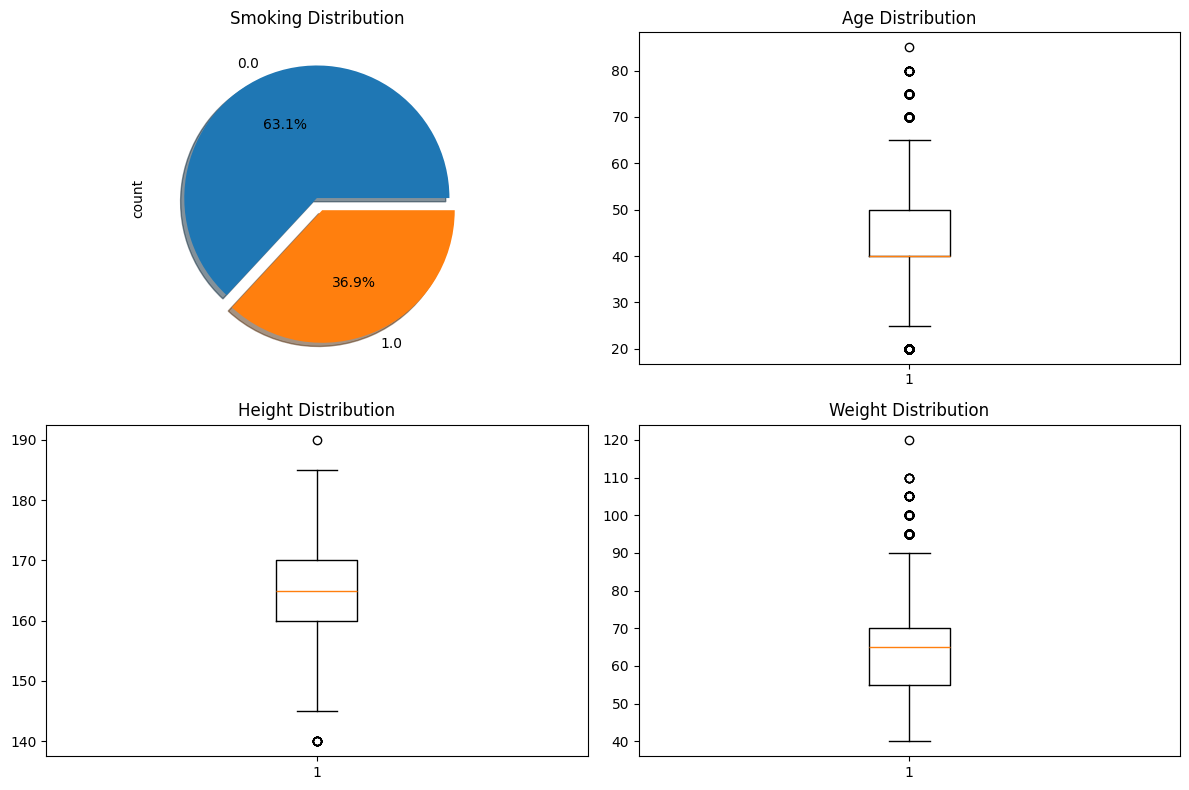

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

df['smoking'].value_counts().plot.pie(
    ax=axes[0, 0], 
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    shadow=True
)
axes[0, 0].set_title('Smoking Distribution')

axes[0, 1].boxplot(train["age"])
axes[0, 1].set_title('Age Distribution')

axes[1, 0].boxplot(train["height(cm)"])
axes[1, 0].set_title('Height Distribution')

axes[1, 1].boxplot(train["weight(kg)"])
axes[1, 1].set_title('Weight Distribution')

plt.tight_layout()
plt.show()


In [27]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   height(cm)           15000 non-null  float64
 2   weight(kg)           15000 non-null  float64
 3   waist(cm)            15000 non-null  float64
 4   eyesight(left)       15000 non-null  float64
 5   eyesight(right)      15000 non-null  float64
 6   hearing(left)        15000 non-null  float64
 7   hearing(right)       15000 non-null  float64
 8   systolic             15000 non-null  float64
 9   relaxation           15000 non-null  float64
 10  fasting blood sugar  15000 non-null  float64
 11  Cholesterol          15000 non-null  float64
 12  triglyceride         15000 non-null  float64
 13  HDL                  15000 non-null  float64
 14  LDL                  15000 non-null  float64
 15  hemoglobin           15000 non-null 